In [1]:
# importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.dates as mdates

In [2]:
#  Reading dataset 
df = pd.read_excel("sample_data.xlsx") 

In [3]:
actual  = pd.read_excel("sample_data.xlsx", sheet_name='actual',header=1) # reading the actual sheet
normal  = pd.read_excel("sample_data.xlsx", sheet_name='norm', header=1) # reading the normal sheet
spatial = pd.read_excel("sample_data.xlsx", sheet_name='spatial', header =1) # reading the spatial sheet

In [4]:
actual.head()

,S.NO.,STATION,LAT,LON,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,...,2023-06-21 00:00:00,2023-06-22 00:00:00,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00
0,1,CAR NICOBAR,9.17,92.83,0.0,6.0,0.0,15.5,27.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.2,36.0,24.0
1,2,IAF CARNICOBAR,9.15,92.81,0.0,3.8,8.0,16.0,24.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,2.4,8.6,26.0,36.0
2,3,NANCOWARY,7.98,93.53,7.8,5.8,5.0,3.0,4.6,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6,0.0
3,4,LONG ISLAND,12.42,92.93,10.6,2.4,-99.9,6.7,72.5,18.7,...,14.9,35.4,5.0,0.0,0.0,0.0,48.0,19.0,5.0,9.4
4,5,MAYA BANDAR,12.92,92.92,2.0,0.2,7.4,3.0,17.0,22.0,...,12.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
first_station = actual.iloc[0, :] # extracting  actual data for first station
first_station_norm = normal.iloc[0,:] # extracting normal data for first station


In [6]:
first_station_norm

S.NO.                            1
STATION                CAR NICOBAR
LAT                           9.17
LON                          92.83
2023-06-01 00:00:00           10.2
2023-06-02 00:00:00           13.6
2023-06-03 00:00:00           18.9
2023-06-04 00:00:00           11.6
2023-06-05 00:00:00           13.3
2023-06-06 00:00:00            8.4
2023-06-07 00:00:00            9.8
2023-06-08 00:00:00            9.9
2023-06-09 00:00:00           14.3
2023-06-10 00:00:00            6.1
2023-06-11 00:00:00            9.1
2023-06-12 00:00:00            6.8
2023-06-13 00:00:00           11.1
2023-06-14 00:00:00            8.1
2023-06-15 00:00:00            9.8
2023-06-16 00:00:00            8.0
2023-06-17 00:00:00            6.8
2023-06-18 00:00:00            4.5
2023-06-19 00:00:00            4.9
2023-06-20 00:00:00            7.6
2023-06-21 00:00:00            9.2
2023-06-22 00:00:00            9.9
2023-06-23 00:00:00            7.2
2023-06-24 00:00:00            6.5
2023-06-25 00:00:00 

In [7]:
new_ds = pd.DataFrame() # Creating a  new data set for storing the first station dataset
new_ds['date'] = first_station.index[4:] # adding date
new_ds['actual_rf']= first_station.values[4:] # adding actual rainfall


In [8]:

#lets check the newly created dataset
new_ds
# now i want to calculate the cumulative sum
new_ds['cum_sum'] = new_ds['actual_rf'].cumsum()
# now i will add the normal rainfall in this dataset
new_ds['normal'] = first_station_norm.values[4:]
new_ds['cum_normal']= new_ds['normal'].cumsum()

# Creating a bar plot of actual rainfall and line plot of normal rainfall 

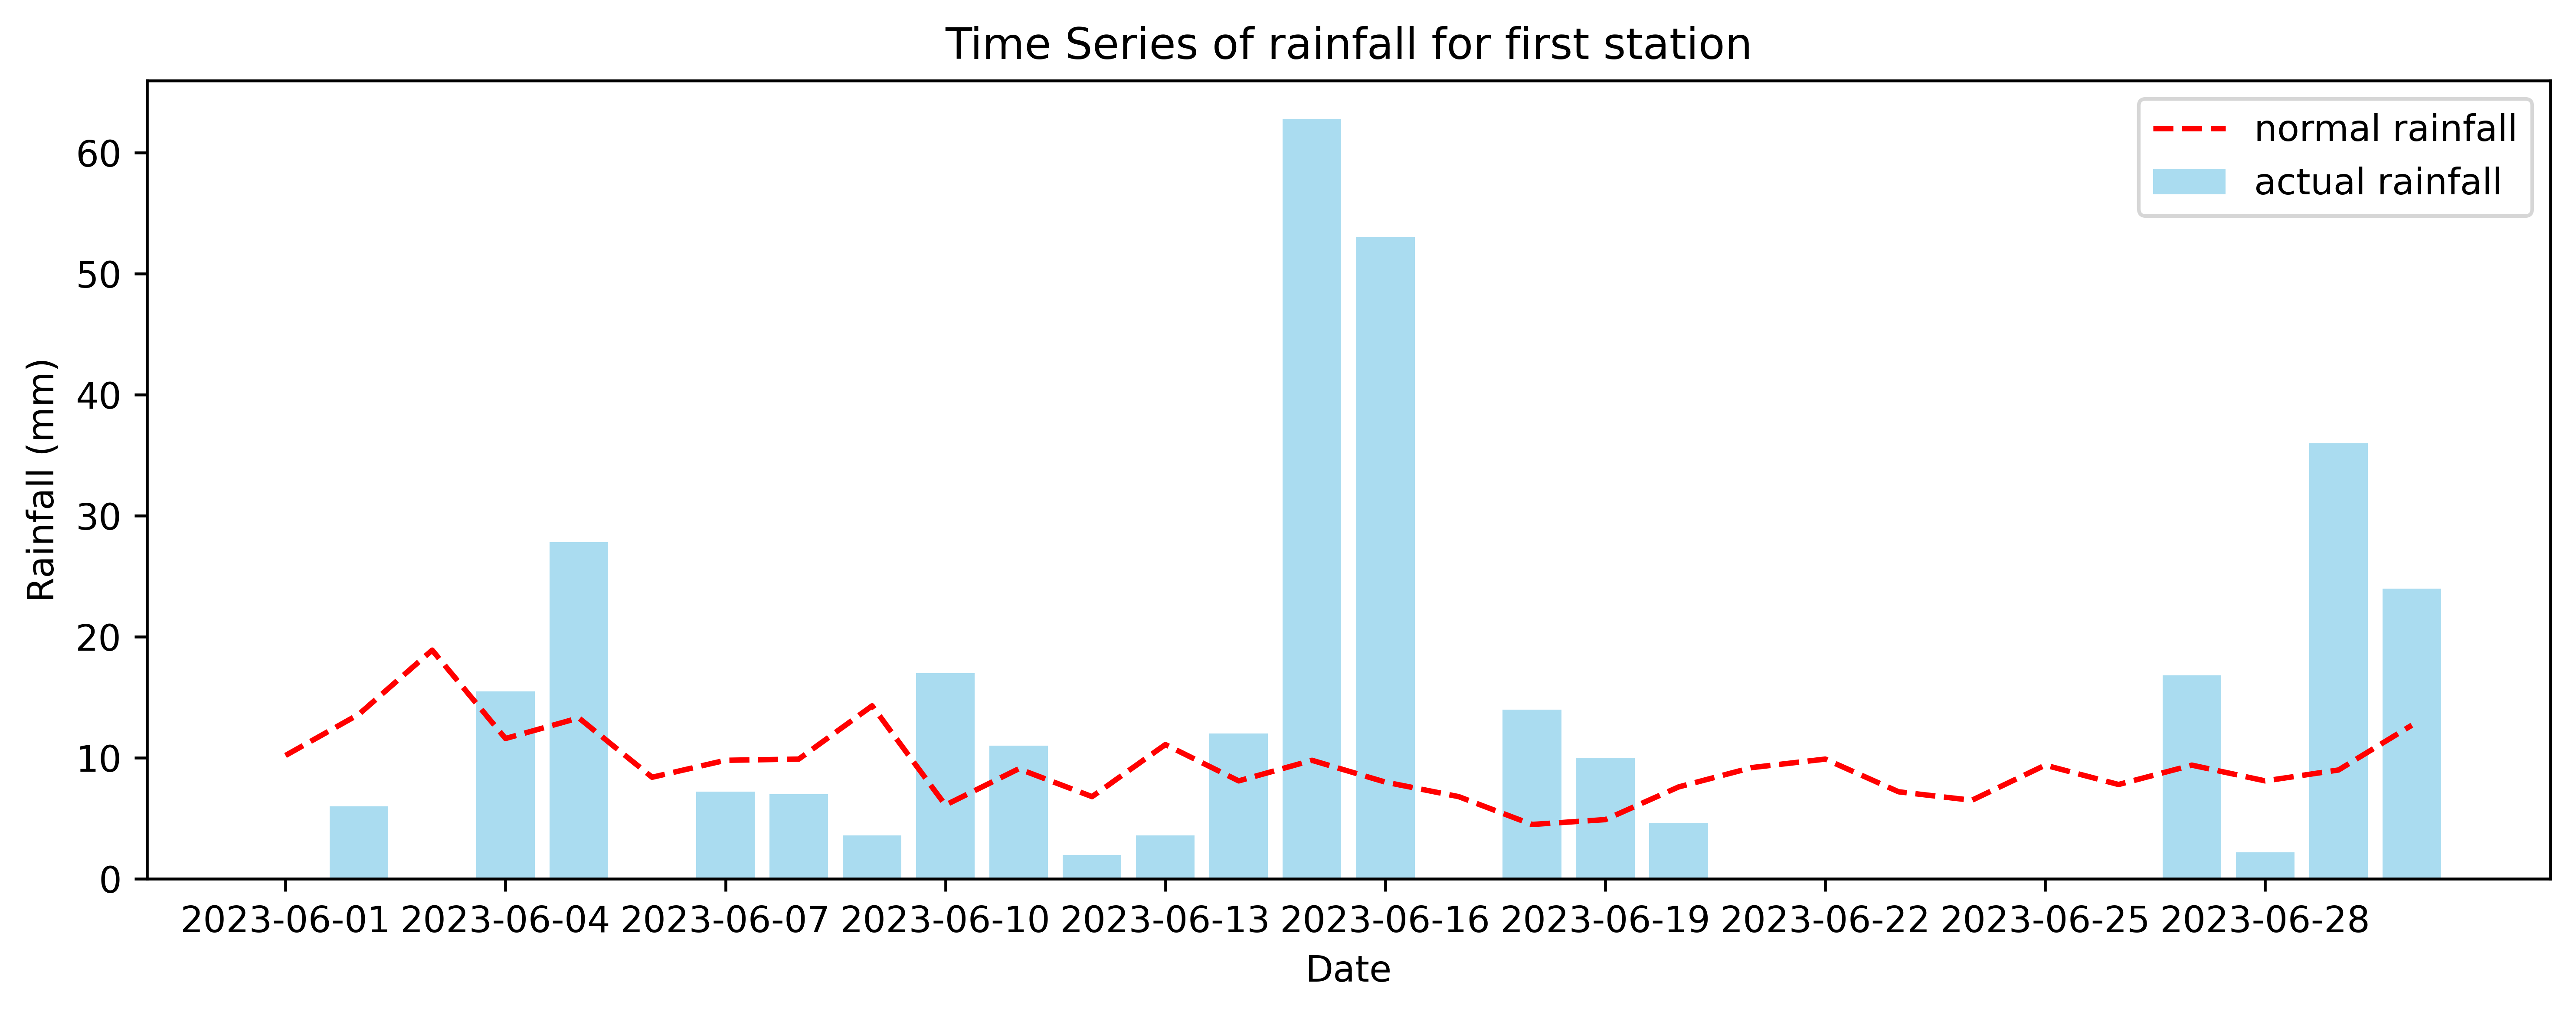

In [9]:

# Create a bar plot

plt.figure(figsize=(10, 4), dpi=600)  # Adjust the figure size if needed
plt.bar(new_ds['date'], new_ds['actual_rf'], width=0.8, color='skyblue', alpha=0.7,label ='actual rainfall')
plt.plot(new_ds['date'], new_ds['normal'], linestyle='--', color ='red', label ='normal rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Time Series of rainfall for first station')
# Format x-axis ticks to display only date and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate x-axis labels for better readability (optional)
plt.xticks(new_ds['date'][::3],rotation=0)  # Rotate x-axis labels for better readability (optional)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


# Creating a line plot of cumulative rainfall and line plot of normal rainfall

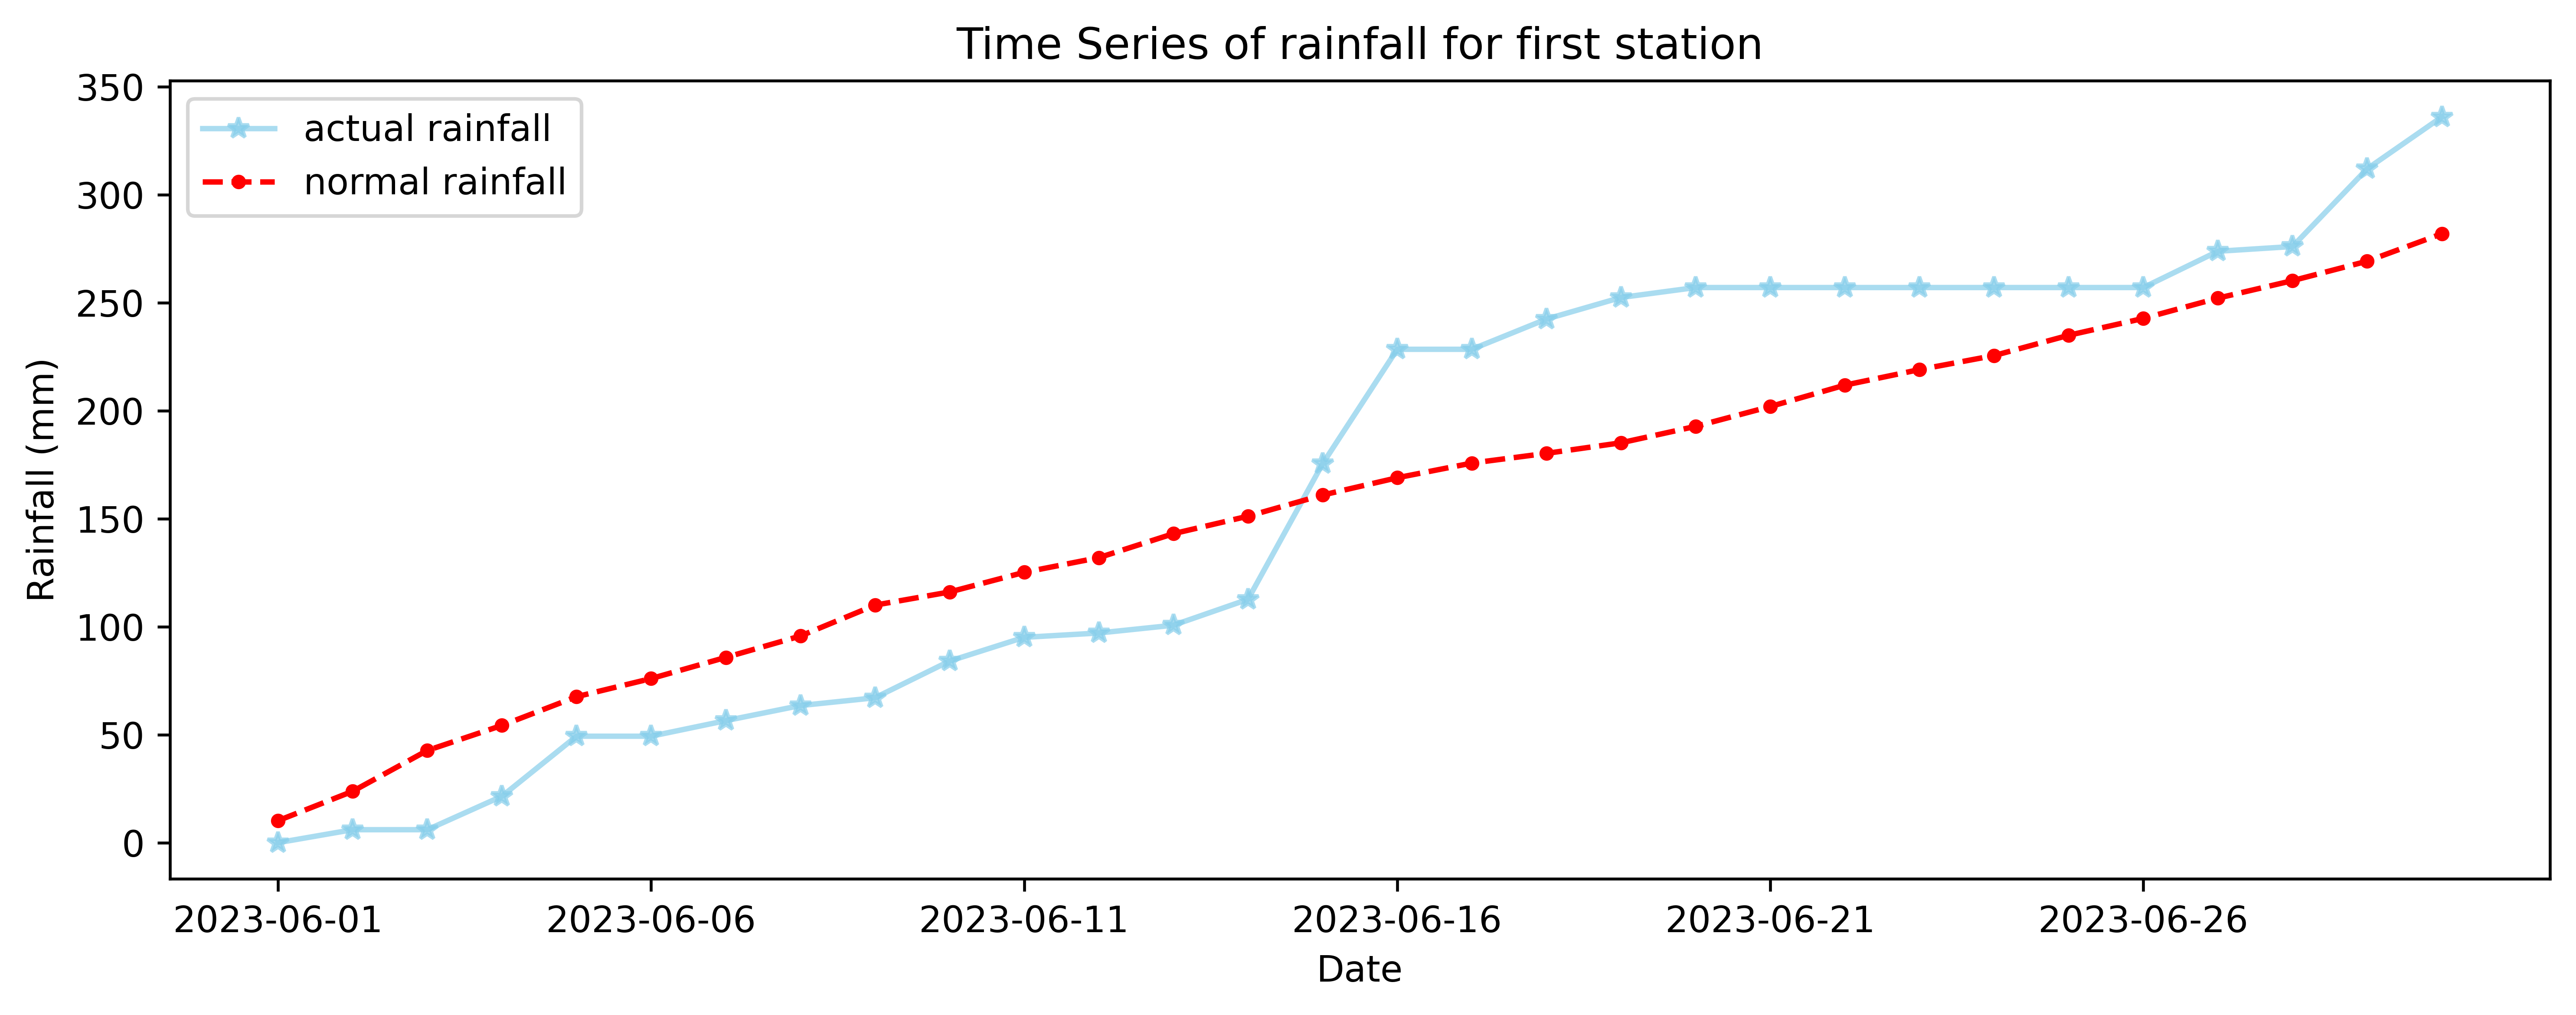

In [10]:
import matplotlib.dates as mdates

# Create a bar plot

plt.figure(figsize=(10, 4), dpi=600)  # Adjust the figure size if needed
plt.plot(new_ds['date'], new_ds['cum_sum'], color='skyblue', alpha=0.7,label ='actual rainfall', marker='*')
plt.plot(new_ds['date'], new_ds['cum_normal'], linestyle='--', color ='red', label ='normal rainfall', marker='.')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Time Series of rainfall for first station')
# Format x-axis ticks to display only date and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate x-axis labels for better readability (optional)
plt.xticks(new_ds['date'][::5],rotation=0)  # Rotate x-axis labels for better readability (optional)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


# creating multiple plots for different number of station


In [11]:
#
df_all = actual.iloc[:,4:] # extracting all time series dataset from the file

In [12]:
normal_all = normal.iloc[:,4:]  # extracting all data of normal 

In [13]:
df_al

NameError: name 'df_al' is not defined

In [ ]:
station_name = actual['STATION'] # extracting a station name data from the given file


In [ ]:
df_all = df_all.replace(-99.9, np.nan) # replacing specific value with nan


In [ ]:

for i in range(10): # to create 10 plots
    
    
    plt.figure(figsize=(6, 2), dpi=600)  # Adjust the figure size if needed
    plt.bar(df_all.iloc[i,:].index, df_all.iloc[i,:].values, width=0.8, color='skyblue', alpha=0.7)
    plt.plot(normal_all.iloc[i,:].index, normal_all.iloc[i,:].values, linestyle='--', color ='red')

    plt.xlabel('Date')
    plt.ylabel('Rainfall')
    plt.title('('+str(station[i])+'-Daily rainfall (mm)')
    # Format x-axis ticks to display only date and year
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(df_all.iloc[i,:].index[::10],rotation=0)  # Rotate x-axis labels for better readability (optional)

    # Display the plot
    plt.tight_layout()
    plt.savefig('rainfall+'+str(station[i])+'.png', dpi =250)
    plt.show()


## Lets explore the spatial ploting dataset

In [14]:
spatial

,S.NO.,STATION,LAT,LON,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,...,2023-06-21 00:00:00,2023-06-22 00:00:00,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00
0,1,CAR NICOBAR,9.17,92.83,0.0,6.0,0.0,15.5,27.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.2,36.0,24.0
1,2,IAF CARNICOBAR,9.15,92.81,0.0,3.8,8.0,16.0,24.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,2.4,8.6,26.0,36.0
2,3,NANCOWARY,7.98,93.53,7.8,5.8,5.0,3.0,4.6,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6,0.0
3,4,LONG ISLAND,12.42,92.93,10.6,2.4,19.9,6.7,72.5,18.7,...,14.9,35.4,5.0,0.0,0.0,0.0,48.0,19.0,5.0,9.4
4,5,MAYA BANDAR,12.92,92.92,2.0,0.2,7.4,3.0,17.0,22.0,...,12.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,4416,VYTTIRI,11.55,76.04,2.2,0.0,16.5,16.4,10.0,-99.9,...,0.0,11.0,0.0,5.0,3.0,14.0,6.5,37.0,3.0,21.0
4416,4417,AGATHI,10.85,72.47,31.2,0.2,0.0,1.4,92.6,2.0,...,0.4,0.0,0.7,0.0,0.0,61.2,25.6,7.8,0.7,12.2
4417,4418,AMINI,11.12,72.73,0.0,1.6,0.0,0.0,0.0,0.0,...,0.7,0.0,1.2,0.0,3.4,9.9,4.7,12.7,25.3,1.4
4418,4419,KAVARATTI,10.57,72.62,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9


In [16]:
#
lat = spatial['LAT'] # extracting lat column from spatial dataset sheet 
lon = spatial['LON'] # extracting lon column from spatial dataset sheet
var = spatial.iloc[:,4] # extracting the 1 day data from spatial sheet

In [17]:
lat.shape
lon.shape

(4420,)

In [18]:
import numpy as np

# Irregular latitude and longitude coordinates
lats = np.asarray([lat])[0]
lons = np.asarray([lon])[0]

# Corresponding data values
data = np.asarray([var])[0]

min_lat,max_lat, num_rows = np.min(lats), np.max(lats), lats.shape[0]
min_lon,max_lon, num_columns = np.min(lons), np.max(lons),lons.shape[0]

In [19]:
new_data =np.where(data==-99.9, np.nan, data)

In [29]:
grid_lats = np.arange(min_lat,max_lat, 0.25) # to create a regular grid lat in 0.25 resolution
grid_lons = np.arange(min_lon,max_lon,0.25) # to create a regular grid lon in 0.25 resolution
# Create a meshgrid from the grid coordinates which are defined
grid_lons, grid_lats = np.meshgrid(grid_lons, grid_lats) 

In [30]:
from scipy.interpolate import griddata # import a griddata from scipy library
# Perform linear interpolation
grid_data = griddata((lons, lats), new_data, (grid_lons, grid_lats), method='linear', rescale=True)

In [31]:
new_grid_data =np.where(grid_data<0, np.nan,grid_data)

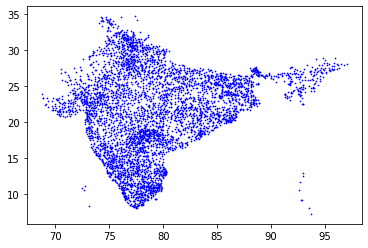

In [22]:
#plt.contourf(new_data, cmap ='jet', vmin=0.1, vmax =100); plt.colorbar()

plt.scatter(lon,lat, color='b', marker ='.', s=2) # quickly visualize station location

In [32]:
import regionmask # module for creating a mask for specific region
read_shp =gpd.read_file("D:\homogenous_region_shp\Homogeneous Region Shape File1.shp") # read shape file

mask = regionmask.mask_geopandas(read_shp,grid_lons,grid_lats).values # this will create the mask for lat, lon for which you are interested


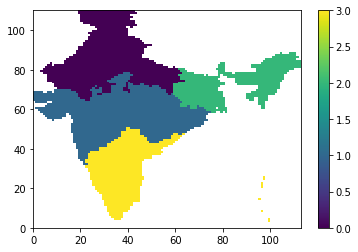

In [33]:
plt.pcolormesh(mask) # quick visualiztion of mask
plt.colorbar()

In [34]:
mask = np.where(mask<=3, 1, np.nan) # mask has 0 to 3 , i want  1

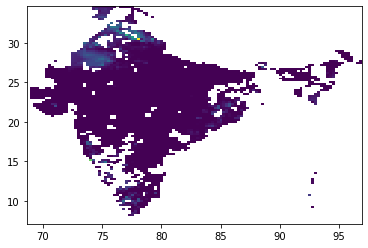

In [35]:

# multiplying with mask
data = new_grid_data*mask
plt.pcolormesh(grid_lons, grid_lats,data)

In [41]:
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geopandas as gpd
import matplotlib
read_shp =gpd.read_file("D:\homogenous_region_shp\Homogeneous Region Shape File1.shp")
# reading shape files 

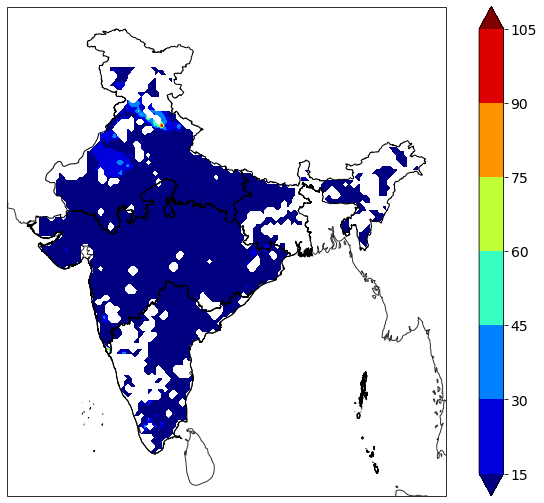

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree())
vp_fill = plt.contourf(grid_lons,grid_lats,data,transform=ccrs.PlateCarree(),
                       cmap='jet',extend='both')
cbar=plt.colorbar(vp_fill, orientation='vertical')
cbar.ax.tick_params(labelsize=14)#----To adjust size of labels in color bar
plt.rcParams["figure.figsize"]=(12,9)
ax.coastlines(alpha=0.8)
read_shp.plot(ax=ax, edgecolor='black',linewidth = 1.0, facecolor ='None')

plt.savefig('regridded_data_spatial.png', dpi=600)

In [ ]:
# convert netcdf to text file

import xarray as xr

ds = xr.open_dataset("E:imd_data/RF25_ind2000_rfp25.nc")

# Reading GRD files in python 
required library : xgrads

In [38]:
# Converting grd to netcdf files
from xgrads import open_CtlDataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geopandas as gpd
import matplotlib

In [39]:
df = open_CtlDataset('E:ctl_data/d-1.ctl') # read the file


In [40]:
# read the variables from file
lat = df['lat'].values # you can read in array format just add .values 
lon = df['lon'].values
rainfall = df['RF'].values

In [ ]:
# Converting this grd file into netcdf

input_file = 'E:ctl_data/d-1.ctl'


open_CtlDataset(input_file).to_netcdf('4_sep_rainfall.nc')


In [ ]:
read_ctl = open_CtlDataset(input_file)
read_shp =gpd.read_file("D:\homogenous_region_shp\Homogeneous Region Shape File1.shp")



In [ ]:
# Creating a colormap in python
rgb = np.genfromtxt('anom_map.rgb') # read a rgb file
# print(rgb)
color = rgb/256
# Following command will create a colormap
mymap =matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', color)


In [ ]:
mymap

In [ ]:
read_ctl

In [ ]:
anom = read_ctl['RF'].values[2,:,:] # extract the variabe for ploting
lon = read_ctl['lon'].values
lat = read_ctl['lat'].values

# replacing undefined value with nan
anom1 = np.where(anom ==-999., np.nan, anom)

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
levels1 =[-20,-10,-5,0,5,10,20]#-----Color levels for color bar
vp_fill = plt.contourf(lon,lat,anom1,levels=levels1,transform=ccrs.PlateCarree(),
                       cmap=mymap,extend='both')
cbar=plt.colorbar(vp_fill, orientation='vertical')
cbar.ax.tick_params(labelsize=14)#----To adjust size of labels in color bar
plt.rcParams["figure.figsize"]=(12,9)
ax.coastlines(alpha=0.8)
read_shp.plot(ax=ax, edgecolor='black',linewidth = 1.0, facecolor ='None')

plt.savefig('anomaly_rainfall.png', dpi=600)

# Excercise

1. Create a line and bar plot for IAF CAR NICOBAR station 
2. Read GRD file and convert to the netcdf (I will provide a GRD and descriptory file)
3. create a regular grid data for date 2023-06-02